<a href="https://colab.research.google.com/github/KevOdhiambo/Unsupervised-Learning-With-R/blob/main/Association_Rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Association Rules

This section you are to create association rules that will allow you to identify relationships between variables in the dataset. You are provided with a separate dataset that comprises groups of items that will be associated with others. Just like in the other sections, you will also be required to provide insights for your analysis

### Data Analysis Objectives
Perform associative analysis on items sales data to identify relationships between items bought.

### Understanding context
Carrefour Kenya seeks to undertake a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax).Associative analysis on sales data would be helpful in identifying customer purchase trends and behaviour.

### Experimental Design

- Problem definition
- Data Loading
- Exploratory data analysis
- Implementation of the solution
- Summary of findings

In [1]:
%load_ext rpy2.ipython

In [7]:
%%R
#Install necessary packages
install.packages('arules')
install.packages('arulesViz')
install.packages("dplyr")

(as ‘lib’ is unspecified)







	‘/tmp/RtmphCahIF/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmphCahIF/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmphCahIF/downloaded_packages’



In [8]:
%%R
#load the lirary packages
library(arules)
library(arulesViz)
library(dplyr)

Attaching package: ‘dplyr’



    intersect, recode, setdiff, setequal, union



    filter, lag



    intersect, setdiff, setequal, union




In [10]:
%%R
#LOad dataset
sales <- read.transactions("SalesDataII.csv", sep="," , header = FALSE)

In [48]:
%%R
# Verifying the object's class
class(sales)

[1] "transactions"
attr(,"package")
[1] "arules"


In [12]:
%%R
#preview our transactions
head(sales)

transactions in sparse format with
 6 transactions (rows) and
 119 items (columns)


In [13]:
%%R
# Number of unique items bought
length(itemLabels(sales))

[1] 119


In [14]:
%%R
#  summary of the transactions
summary(sales)

#mineral water was the most purchased

transactions as itemMatrix in sparse format with
 7501 rows (elements/itemsets/transactions) and
 119 columns (items) and a density of 0.03288973 

most frequent items:
mineral water          eggs     spaghetti  french fries     chocolate 
         1788          1348          1306          1282          1229 
      (Other) 
        22405 

element (itemset/transaction) length distribution:
sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
1754 1358 1044  816  667  493  391  324  259  139  102   67   40   22   17    4 
  18   19   20 
   1    2    1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   2.000   3.000   3.914   5.000  20.000 

includes extended item information - examples:
             labels
1           almonds
2 antioxydant juice
3         asparagus


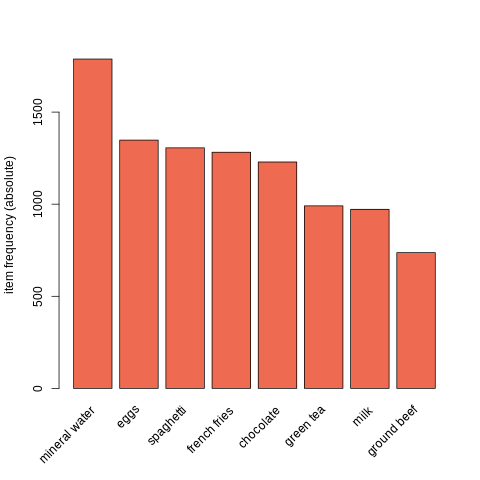

In [15]:
%%R
# Plot the top 8 most frequently purchased items
itemFrequencyPlot(sales, topN = 8, type='absolute',col="coral2")

#Mineral water, eggs and spaghetti are the most frequently purchased items. 

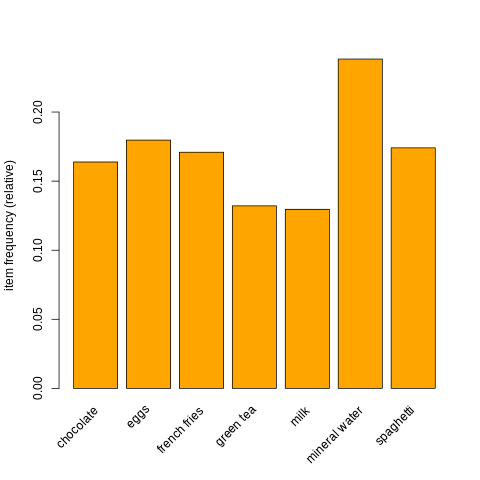

In [17]:
%%R
# Plot items with a minimum support of 0.1
itemFrequencyPlot(sales, support = 0.1, col = "orange")

#Seven items have a support of 0.1 or above.

In [18]:
%%R
# Support per item
support <- sort(itemFrequency(sales) * 100)

In [19]:
%%R
# Percentage of items with a support less than 0.1%
length(support[support < 0.1])/ 119 * 100

[1] 2.521008


In [20]:
%%R
# Percentage of items with a support less than 0.2%
length(support[support < 0.2])/ 119 * 100

[1] 3.361345


In [22]:
%%R
# Build models based on association rules


# Using minimum support of 0.002 and confidence of 0.6
rule1 <- apriori(sales, parameter = list(supp = 0.002, conf = 0.6, maxlen=10))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5   0.002      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 15 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.01s].
sorting and recoding items ... [115 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 done [0.01s].
writing ... [43 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [23]:
%%R
# Using minimum support of 0.001 and confidence of 0.8
rule2 <- apriori(sales, parameter = list(supp = 0.001, conf = 0.8, maxlen=10))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.01s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.02s].
writing ... [74 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [24]:
%%R
#Get summary stats for Rule 1
summary(rule1)

#A minimum support and confidence of 0.002 and .6 respectively generate 43 rules

set of 43 rules

rule length distribution (lhs + rhs):sizes
 3  4 
16 27 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   3.000   4.000   3.628   4.000   4.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.002133   Min.   :0.6000   Min.   :0.002533   Min.   : 2.517  
 1st Qu.:0.002200   1st Qu.:0.6180   1st Qu.:0.003333   1st Qu.: 2.637  
 Median :0.002400   Median :0.6400   Median :0.003866   Median : 2.743  
 Mean   :0.002713   Mean   :0.6643   Mean   :0.004145   Mean   : 3.315  
 3rd Qu.:0.003066   3rd Qu.:0.6972   3rd Qu.:0.004666   3rd Qu.: 3.344  
 Max.   :0.005066   Max.   :0.9500   Max.   :0.007999   Max.   :11.976  
     count      
 Min.   :16.00  
 1st Qu.:16.50  
 Median :18.00  
 Mean   :20.35  
 3rd Qu.:23.00  
 Max.   :38.00  

mining info:
  data ntransactions support confidence
 sales          7501   0.002        0.6
                                                                         

In [25]:
%%R
#summar for rule 2
summary(rule2)

#A minimum support and confidence of 0.001 and .8 respectively generates 74 rules

set of 74 rules

rule length distribution (lhs + rhs):sizes
 3  4  5  6 
15 42 16  1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.000   4.000   4.000   4.041   4.000   6.000 

summary of quality measures:
    support           confidence        coverage             lift       
 Min.   :0.001067   Min.   :0.8000   Min.   :0.001067   Min.   : 3.356  
 1st Qu.:0.001067   1st Qu.:0.8000   1st Qu.:0.001333   1st Qu.: 3.432  
 Median :0.001133   Median :0.8333   Median :0.001333   Median : 3.795  
 Mean   :0.001256   Mean   :0.8504   Mean   :0.001479   Mean   : 4.823  
 3rd Qu.:0.001333   3rd Qu.:0.8889   3rd Qu.:0.001600   3rd Qu.: 4.877  
 Max.   :0.002533   Max.   :1.0000   Max.   :0.002666   Max.   :12.722  
     count       
 Min.   : 8.000  
 1st Qu.: 8.000  
 Median : 8.500  
 Mean   : 9.419  
 3rd Qu.:10.000  
 Max.   :19.000  

mining info:
  data ntransactions support confidence
 sales          7501   0.001        0.8
                                                      

In [26]:
%%R
# Sort rules based on confidence
inspect(sort(rule1, by="confidence", decreasing = T)[1:10])

     lhs                                         rhs             support    
[1]  {mushroom cream sauce, pasta}            => {escalope}      0.002532996
[2]  {frozen vegetables, olive oil, tomatoes} => {spaghetti}     0.002133049
[3]  {pancakes, soup, spaghetti}              => {mineral water} 0.002266364
[4]  {frozen vegetables, milk, soup}          => {mineral water} 0.003066258
[5]  {frozen vegetables, ground beef, shrimp} => {spaghetti}     0.002399680
[6]  {red wine, turkey}                       => {mineral water} 0.002133049
[7]  {cooking oil, pancakes, spaghetti}       => {mineral water} 0.002133049
[8]  {nonfat milk, spaghetti}                 => {mineral water} 0.002399680
[9]  {eggs, milk, olive oil}                  => {mineral water} 0.002666311
[10] {cooking oil, eggs, spaghetti}           => {mineral water} 0.002932942
     confidence coverage    lift      count
[1]  0.9500000  0.002666311 11.976387 19   
[2]  0.8421053  0.002532996  4.836624 16   
[3]  0.7727273  0.002

In [33]:
%%R
# Visualize top 10 rules
top_rules <- head(rule1, n = 10, by='confidence')

plot(top_rules, method = "graph",  engine = "htmlwidget")

In [31]:
%%R
# Sort rules based on confidence
inspect(sort(rule2, by='confidence', decreasing = T)[1:10])

     lhs                        rhs                 support confidence    coverage      lift count
[1]  {french fries,                                                                               
      mushroom cream sauce,                                                                       
      pasta}                 => {escalope}      0.001066524  1.0000000 0.001066524 12.606723     8
[2]  {ground beef,                                                                                
      light cream,                                                                                
      olive oil}             => {mineral water} 0.001199840  1.0000000 0.001199840  4.195190     9
[3]  {cake,                                                                                       
      meatballs,                                                                                  
      mineral water}         => {milk}          0.001066524  1.0000000 0.001066524  7.717078     8
[4]  {cake

In [32]:
%%R
#Visualize our fndings on a plot
top <- head(rule2, n=10, by='confidence')
plot(top, method = 'graph', engine = 'htmlwidget')

Mushroom, cream sauce, and pasta are most frequently bought.

In [34]:
%%R
# Create shorter association rules
short_rules <- apriori(sales, parameter = list(supp = 0.001, conf = 0.8, maxlen=4))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
      4  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.02s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 done [0.05s].
writing ... [57 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [36]:
%%R
# Sort rules based on confidence
inspect(sort(short_rules, by='confidence', decreasing = T)[1:20])

     lhs                        rhs                 support confidence    coverage      lift count
[1]  {french fries,                                                                               
      mushroom cream sauce,                                                                       
      pasta}                 => {escalope}      0.001066524  1.0000000 0.001066524 12.606723     8
[2]  {ground beef,                                                                                
      light cream,                                                                                
      olive oil}             => {mineral water} 0.001199840  1.0000000 0.001199840  4.195190     9
[3]  {cake,                                                                                       
      meatballs,                                                                                  
      mineral water}         => {milk}          0.001066524  1.0000000 0.001066524  7.717078     8
[4]  {cake

In [37]:
%%R
#plot
top <- head(short_rules, n=10, by='confidence')
plot(top, method = 'graph', engine = 'htmlwidget')

In [42]:
%%R
# Get association rules associated to spaghetti
spaghetti_ruleset <- apriori(sales, parameter = list(supp=0.001, conf=0.8), appearance = list(default="lhs", rhs="spaghetti"))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.01s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.03s].
writing ... [16 rule(s)] done [0.00s].
creating S4 object  ... done [0.01s].


In [47]:
%%R
# Sort rule

inspect(spaghetti_ruleset)

#Items most bought before spaghetti are shrimp and salmon.

     lhs                     rhs             support confidence    coverage     lift count
[1]  {bacon,                                                                              
      pancakes}           => {spaghetti} 0.001733102  0.8125000 0.002133049 4.666587    13
[2]  {chicken,                                                                            
      protein bar}        => {spaghetti} 0.001199840  0.8181818 0.001466471 4.699220     9
[3]  {green tea,                                                                          
      ground beef,                                                                        
      tomato sauce}       => {spaghetti} 0.001333156  0.8333333 0.001599787 4.786243    10
[4]  {light cream,                                                                        
      mineral water,                                                                      
      shrimp}             => {spaghetti} 0.001066524  0.8888889 0.001199840 5.105326     8

In [40]:
%%R
%%R
# Get association rules associated to shrimp
shrimp_ruleset <- apriori(sales, parameter = list(supp=0.001, conf=0.8), appearance = list(default="lhs", rhs="shrimp"))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5   0.001      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 7 

set item appearances ...[1 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.02s].
sorting and recoding items ... [116 item(s)] done [0.00s].
creating transaction tree ... done [0.01s].
checking subsets of size 1 2 3 4 5 6 done [0.05s].
writing ... [2 rule(s)] done [0.01s].
creating S4 object  ... done [0.01s].


In [41]:
%%R
# Sort rule

inspect(shrimp_ruleset)
#Customers purchase pasta before purchasing shrimp

    lhs                             rhs      support     confidence coverage   
[1] {milk, pasta}                => {shrimp} 0.001599787 0.8571429  0.001866418
[2] {eggs, mineral water, pasta} => {shrimp} 0.001333156 0.9090909  0.001466471
    lift     count
[1] 11.99520 12   
[2] 12.72218 10   



### Summary of findings


1. Mushroom cream sauce and pasta are most often bought together with escalope. Stocking pasta and mushroom cream sauce in the same section or next to each other could increase sales.
2. Shrimp and salmon are most often bought before spaghetti, locating the meat section next to the pasta/spaghetti section could boost sales.
3. Package deals of mushroom sauce and spaghetti together.